<h1 align="center"> Statistics and Financial Data Analysis </h1>




ARIMA Models
===

In [1]:
%reset -f

In [2]:
#import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm
import pandas_datareader as pd_data

In [3]:
# Importing the Time Series Analysis module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.tsa.stattools as sm_tools

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm 
from datetime import datetime
# For splines
import patsy
from patsy import dmatrix
from arch import arch_model
from arch.univariate import ARX
from arch.univariate import GARCH
import pandas_datareader.data as web
import datetime as dt
import scipy.stats as st

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [5]:
# Will fix figure size for this notebook
plt.rcParams["figure.figsize"] = (8,6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:

def plot_diagnosticsTight3(data):

    fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(10,10))
    
    ax1.hist(data, bins =40,color='m', density = True)  
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Resid")
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Resid")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
   
    logData = np.floor(np.log(len(data)))
    ljbox_test = sm.stats.acorr_ljungbox(data,10)#package version issue
    
    ax4.plot(ljbox_test[1])
    ax4.axhline(y=0.05, color='r',ls='--')
    ax4.set_title("LB test")
    ax4.grid()
    
    fig = sm.qqplot(data, line='q', ax = ax5)
    ax5.grid()
    
    ax6.plot(data*data)
    ax6.grid()
    ax6.set_title("Resid Sqr")
    
    plt.tight_layout()


Showing that given a lognormal process, 
===
by construction the log difference is stationary
===

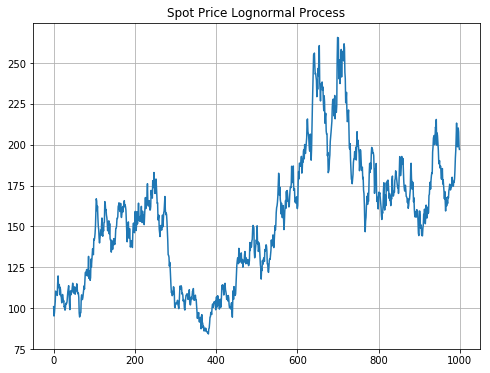

In [6]:
np.random.seed(17)
nSim = 1000
dt = 1/(nSim-1)

rw = np.zeros(nSim)
spotPrice = np.zeros(nSim)
spotPrice_0 = 100
mu_t = 0.1*dt
sqrt_dt = np.sqrt(dt)

for i in range(nSim):
    temp = np.random.normal()
    rw[i] = rw[i-1] + temp
    spotPrice[i] = np.exp(mu_t + sqrt_dt*rw[i])
    
spotPrice = spotPrice_0*spotPrice
    
plt.plot(spotPrice)
plt.title('Spot Price Lognormal Process')
plt.grid()
plt.show()

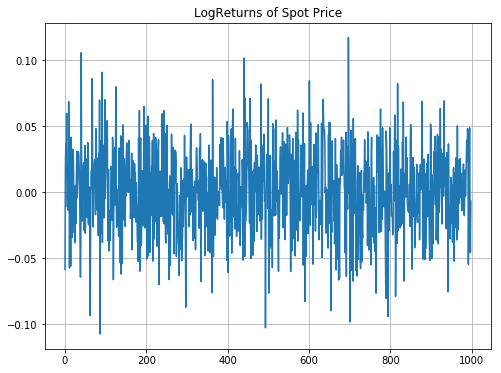

In [7]:
logRtnPrice = np.diff(np.log(spotPrice))
plt.plot(logRtnPrice)
plt.title('LogReturns of Spot Price')
plt.grid()
plt.show()

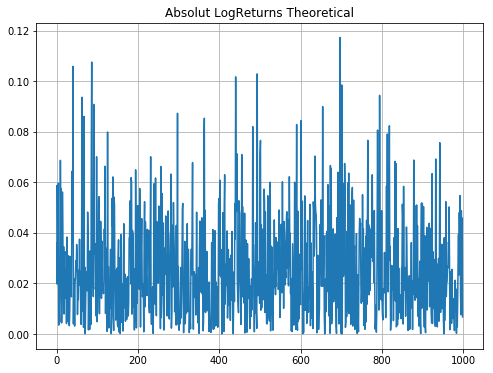

In [130]:
plt.plot(np.abs(logRtnPrice))
plt.title('Absolut LogReturns Theoretical')
plt.grid()
plt.savefig("AbsValLogRtn")

In [127]:
start_date = '2007-01-04'
end_date = '2019-11-04'
GSData = pd_data.DataReader('GS','yahoo',start_date,end_date)
GSData.head()

GS = GSData['Adj Close']
GSLog = np.log(GS)
GSRtn = np.log(GS).diff().dropna()

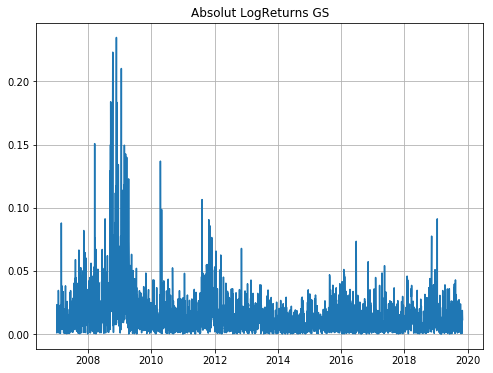

In [129]:
plt.plot(np.abs(GSRtn))
plt.title('Absolut LogReturns GS')
plt.grid()
plt.savefig("AbsValLogRtnGS")

In [9]:
test = adfuller(logRtnPrice)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -32.801457
p-value: 0.000000
Critical Values:i/
	1%: -3.44
	5%: -2.86
	10%: -2.57


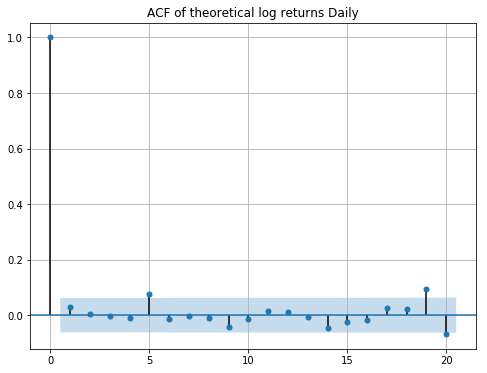

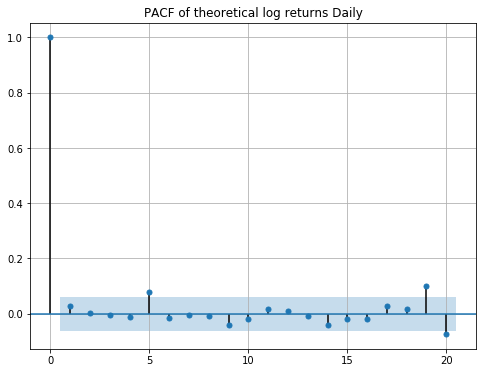

In [11]:
#Squared log returns don't have autocorrelation 
#This is a proxty for squared residuals


y = logRtnPrice*logRtnPrice 
plot_acf(y, lags = 20)
plt.title('ACF of theoretical log returns Daily')
plt.grid()
plot_pacf(y, lags = 20)
plt.title('PACF of theoretical log returns Daily')
plt.grid()
plt.show()

Finance Examples
===


In [13]:
# Selecting Copper ETF 
JJCData = pd.read_csv("JJCMonthly.csv",index_col=0)
JJCData.head()

,JJC.Open,JJC.High,JJC.Low,JJC.Close,JJC.Volume,JJC.Adjusted
1,50.400002,50.400002,49.570000,49.630001,11600,49.630001
2,48.540001,48.540001,41.529999,43.900002,38000,43.900002
3,43.730000,44.950001,40.750000,43.080002,35400,43.080002
4,43.270000,47.590000,43.270000,46.980000,43600,46.980000
5,46.700001,57.709999,45.630001,54.419998,345100,54.419998


p-values very small, so I can reject hypothesis with significancy level at 5%

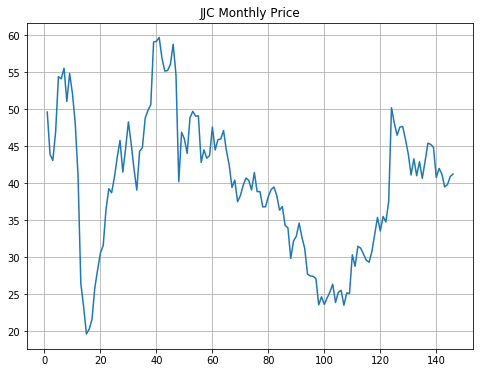

In [14]:
JJC = JJCData['JJC.Adjusted']
plt.plot(JJC)
plt.title('JJC Monthly Price')
plt.grid()
plt.show()

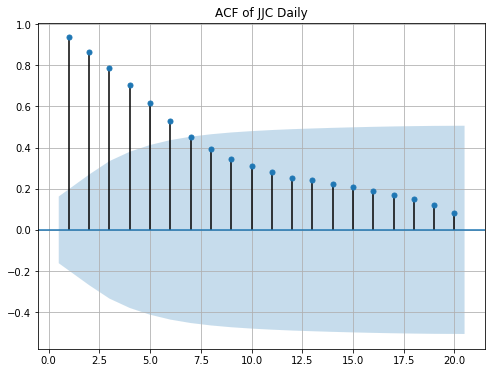

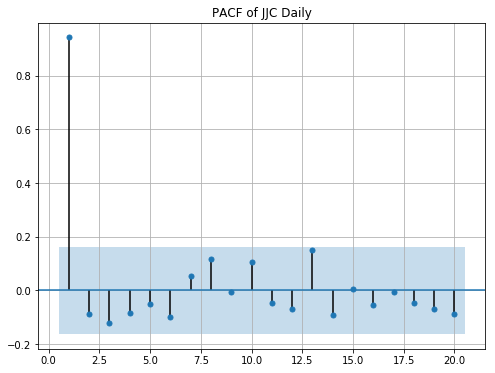

In [15]:
# Usin ACF JJC
plot_acf(JJC, lags = 20, zero = False)
plt.title('ACF of JJC Daily')
plt.grid()
plot_pacf(JJC, lags = 20, zero = False)
plt.title('PACF of JJC Daily')
plt.grid()
plt.show()


In [16]:
test = adfuller(JJC)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -2.252650
p-value: 0.187694
Critical Values:i/
	1%: -3.48
	5%: -2.88
	10%: -2.58


In [17]:
test = kpss(JJC, lags=10) #Notice how the number of lags here has an effect on the test 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 0.309441
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


Now consider taking the difference of log returns
===

In [131]:
JJCLogRtn = np.log(JJC).diff().dropna()

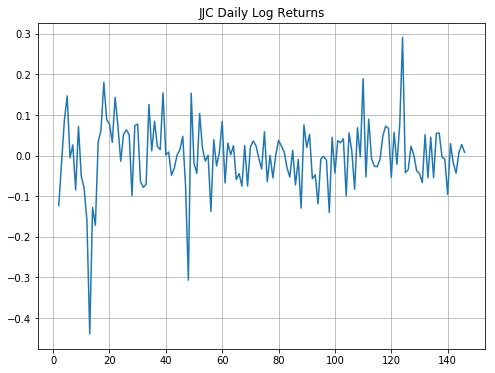

In [132]:
plt.plot(JJCLogRtn)
plt.title('JJC Daily Log Returns')
plt.grid()
plt.show()

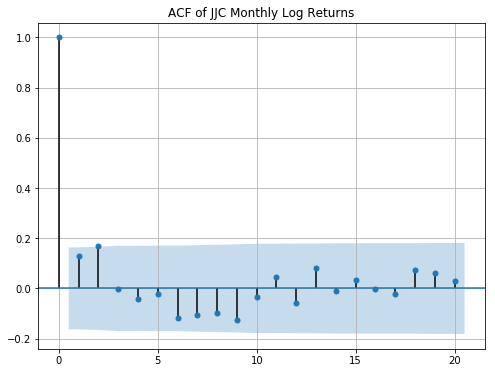

In [133]:
# Usin ACF JJC
plot_acf(JJCLogRtn, lags = 20)
plt.title('ACF of JJC Monthly Log Returns')
plt.grid()
plt.show()

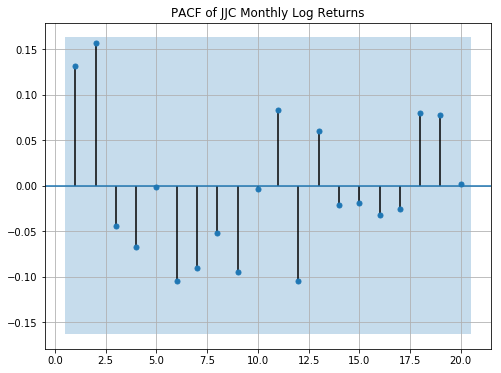

In [134]:
# Usin ACF JJC
plot_pacf(JJCLogRtn, lags = 20,  zero = False)
plt.title('PACF of JJC Monthly Log Returns')
plt.grid()
plt.show()

In [135]:
# Is the data staionary? It seems to reject the ADFuller test (that is, reject the presence of unit root)

test = adfuller(JJCLogRtn)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -10.533093
p-value: 0.000000
Critical Values:i/
	1%: -3.48
	5%: -2.88
	10%: -2.58


In [136]:
# Is the data staionary? It cannot reject KPSS test (support for stationarity)

test = kpss(JJCLogRtn, lags=10) #Notice how the number of lags here has an effect on the test 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 0.073935
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


In [137]:
# Define a very simple function to searhch for models - will have to be flexible, given that
# Python arch_model does not take as mean the ARMA model, but only ARX model...
# When possible, will choose simpler models.

def searchARMA(data, exog, max_p, max_q):
 
    aic = np.zeros((max_p,max_q))
    bic = np.zeros((max_p,max_q))
    for i in range(max_p):
        for j in range(max_q):
            try:
                if(len(exog) == len(data)):
                    model = ARMA(data,(i,j), exog = exog) 
                else:
                     model = ARMA(data,(i,j)) 
                res = model.fit(trend='nc')
                aic[i,j] = res.aic
                bic[i,j] = res.bic
                print('p:',i,' q:', j,' aic:', aic[i,j], ' bic:', bic[i,j])
            except:
                continue

In [138]:
# Unsurprisingly, same here
n=len(JJCLogRtn)
exog = np.ones(n)
searchARMA(JJCLogRtn, exog, max_p=6, max_q = 3)

In [139]:
# Fit model to JJC data (as a test)
model = ARIMA(JJCLogRtn.values, order=(0,0,2))
AR1_res = model.fit()
print(AR1_res.summary());


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  145
Model:                     ARMA(0, 2)   Log Likelihood                 157.035
Method:                       css-mle   S.D. of innovations              0.082
Date:                Thu, 19 Nov 2020   AIC                           -306.069
Time:                        12:09:42   BIC                           -294.162
Sample:                             0   HQIC                          -301.231
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.009     -0.176      0.860      -0.019       0.016
ma.L1.y        0.1179      0.082      1.438      0.153      -0.043       0.279
ma.L2.y        0.1874      0.083      2.259      0.0

Consider GS data
===

In [27]:
start_date = '2007-01-04'
end_date = '2019-11-04'
GSData = pd_data.DataReader('GS','yahoo',start_date,end_date)
GSData.head()

GS = GSData['Adj Close']
GSLog = np.log(GS)
GSRtn = np.log(GS).diff().dropna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-04,200.669998,198.070007,200.220001,198.850006,6460200.0,165.330109
2007-01-05,200.000000,197.899994,198.429993,199.050003,5892900.0,165.496445
2007-01-08,203.949997,198.100006,199.050003,203.729996,7851000.0,169.387482
2007-01-09,204.899994,202.000000,203.539993,204.080002,7147100.0,169.678482
2007-01-10,208.440002,201.500000,203.399994,208.110001,8025700.0,173.029144


In [29]:
# Test presence of unit root: seems to be rejected

test = adfuller(GSRtn)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -13.432037
p-value: 0.000000
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [30]:
# Test stationarity: fails to reject hypothesis of stationarity, good candidate for ARMA model

test = kpss(GSRtn, lags=10) #Notice how the number of lags here has an effect on the test 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 0.085672
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


Given the data appears to be stationary, 
===
need to determine the correct order for an ARMA model
===

In [31]:
import pmdarima as pm 
?pm.auto_arima

In [83]:
GSNew = pd.read_csv("GSNew.csv", index_col=0)

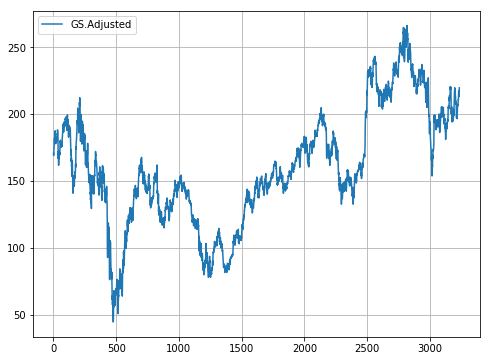

In [84]:
GSNew.plot()
plt.grid()

In [85]:
GSNew.head()
GSNewLog = np.log(GSNew).diff().dropna()
#GSNewLog = GSNewLog.drop(GSNewLog.index[0])
results = pm.auto_arima(GSNewLog,tart_p=2,
    d=None,
    start_q=2,
    max_p=3,
    max_d=2,
    max_q=3,
    seasonal=False,
    information_criterion='aic', trace = True)

Fit ARIMA: order=(2, 0, 2); AIC=-15103.295, BIC=-15066.809, Fit time=1.212 seconds
Fit ARIMA: order=(0, 0, 0); AIC=-15093.646, BIC=-15081.484, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-15097.785, BIC=-15079.542, Fit time=0.023 seconds
Fit ARIMA: order=(0, 0, 1); AIC=-15098.057, BIC=-15079.814, Fit time=0.044 seconds
Fit ARIMA: order=(1, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2); AIC=-15101.503, BIC=-15058.937, Fit time=2.067 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-15100.114, BIC=-15069.710, Fit time=0.612 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1); AIC=-15102.105, BIC=-15077.781, Fit time=0.353 seconds
Fit ARIMA: order=(3, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 4.788 seconds


In [86]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3232
Model:                     ARMA(2, 2)   Log Likelihood                7557.647
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 19 Nov 2020   AIC                         -15103.295
Time:                        08:52:49   BIC                         -15066.809
Sample:                             0   HQIC                        -15090.221
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.62e-05      0.000      0.216      0.829      -0.001       0.001
ar.L1.y       -0.3083      0.105     -2.937      0.003      -0.514      -0.103
ar.L2.y        0.6592      0.104      6.339      0.0

In [87]:
#Auto select ARIMA:

def auto_arima(data, max_p, max_d, max_q):
    resAIC = []
    order = []
    for p in range(max_p):
        for d in range(max_d):
            for q in range(max_q):
                try:
                    model = ARIMA(data, order=(p,d,q))
                    results = model.fit()
                    resAIC.append(results.aic)
                    order.append([p,d,q])
                    print('p=', p,'d=', d, 'q=', q, results.aic)
                except ValueError:
                    continue
    return [resAIC, order]

In [73]:
auto_arima(GSNewLog,3,2,3)

p= 0 d= 0 q= 0 -15093.646001527832
p= 0 d= 0 q= 1 -15098.056765081716
p= 0 d= 0 q= 2 -15097.577748402853
p= 0 d= 1 q= 0 -12710.828011392616
p= 0 d= 1 q= 1 -15078.2627766887
p= 1 d= 0 q= 0 -15097.784587382417
p= 1 d= 0 q= 1 -15102.104747797808
p= 1 d= 1 q= 0 -13687.622801447755
p= 1 d= 1 q= 1 -15082.296283026344
p= 1 d= 1 q= 2 -15072.227183833247
p= 2 d= 0 q= 0 -15097.349821826143
p= 2 d= 0 q= 1 -15100.1140357278
p= 2 d= 0 q= 2 -15103.294539085973
p= 2 d= 1 q= 0 -14109.865414094964
p= 2 d= 1 q= 1 -15080.253526982518
p= 2 d= 1 q= 2 -15084.491492069434


[[-15093.646001527832,
  -15098.056765081716,
  -15097.577748402853,
  -12710.828011392616,
  -15078.2627766887,
  -15097.784587382417,
  -15102.104747797808,
  -13687.622801447755,
  -15082.296283026344,
  -15072.227183833247,
  -15097.349821826143,
  -15100.1140357278,
  -15103.294539085973,
  -14109.865414094964,
  -15080.253526982518,
  -15084.491492069434],
 [[0, 0, 0],
  [0, 0, 1],
  [0, 0, 2],
  [0, 1, 0],
  [0, 1, 1],
  [1, 0, 0],
  [1, 0, 1],
  [1, 1, 0],
  [1, 1, 1],
  [1, 1, 2],
  [2, 0, 0],
  [2, 0, 1],
  [2, 0, 2],
  [2, 1, 0],
  [2, 1, 1],
  [2, 1, 2]]]

In [90]:
model = ARIMA(GSNewLog.values, order=(2,0,2))
ARMA_res = model.fit()
print(ARMA_res.summary());

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3232
Model:                     ARMA(2, 2)   Log Likelihood                7557.647
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 19 Nov 2020   AIC                         -15103.295
Time:                        08:53:23   BIC                         -15066.809
Sample:                             0   HQIC                        -15090.221
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.62e-05      0.000      0.216      0.829      -0.001       0.001
ar.L1.y       -0.3083      0.105     -2.937      0.003      -0.514      -0.103
ar.L2.y        0.6592      0.104      6.339      0.0

In [95]:
#Box Ljung test for the residuals 
resid = ARMA_res.resid
print(resid)
ljbox_test_resid_ARMA = sm.stats.acorr_ljungbox(resid,10)
ljbox_test_resid_ARMA


[-0.00943653  0.00056506  0.02283746 ... -0.01082093  0.0181864
  0.0119163 ]


(array([ 0.0694329 ,  0.88806279,  1.33302958,  3.71967375,  5.97340335,
         7.27161779,  9.63156545,  9.6539854 , 20.35690833, 22.33887714]),
 array([0.79216427, 0.64144528, 0.72130522, 0.44527096, 0.3088155 ,
        0.296457  , 0.21043121, 0.29015609, 0.01583311, 0.0134683 ]))

In [96]:
ljbox_test_resid_ARMA[1][9] 

0.013468301527958955

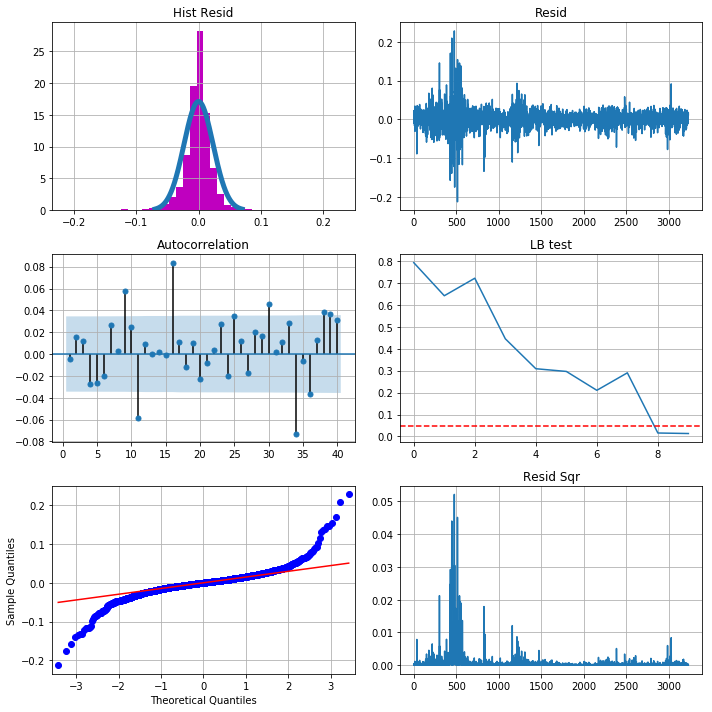

In [97]:
plot_diagnosticsTight3(resid)

In [54]:
AR1_res.params

array([ 5.05690874,  1.67270207, -0.67347302, -0.71904354])

In [98]:
# Use all Coeff as above

phi1 = ARMA_res.params[1]
phi2 = ARMA_res.params[2]


theta1 = ARMA_res.params[3]
theta2 = ARMA_res.params[4]


ar2 = np.array([1, - phi1, -phi2])#The input is inserted as negative in function
ma2 = np.array([1, -theta1,-theta2])
result1 = ArmaProcess(ar2, ma2)
data_ar3 = result1.generate_sample(nsample=len(GSLog))

3232


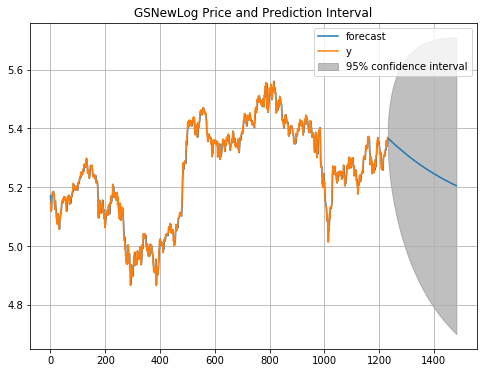

In [100]:
# Using plot_predict to predict prices given the fitted AR 3 model for JJC

lastIdx = len(ARMA_res.fittedvalues) 
print(lastIdx)

inpt = lastIdx+250 #250 days in the future

AR1_res.plot_predict(start=2000,end= inpt)
plt.grid()
plt.title("GSNewLog Price and Prediction Interval")
plt.show()


Example of PACF for AR(p) and MA(q) models
===

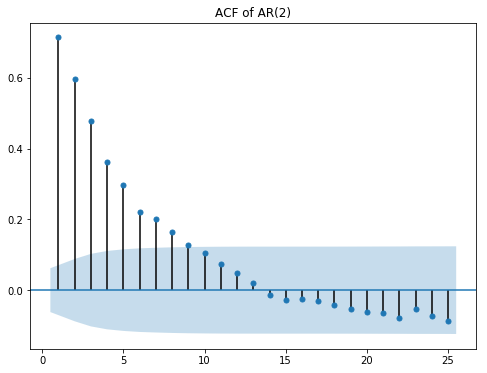

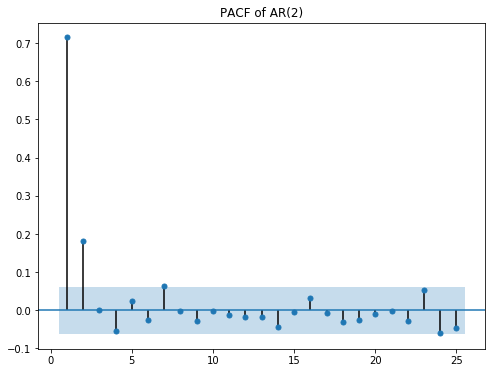

In [101]:
# Example AR(2) model

phi = 0.6
ar1 = np.array([1, - phi,- 0.2])
am1 = np.array([1])
result1 = ArmaProcess(ar1, am1)
data_ar1 = result1.generate_sample(nsample=1000)

plot_acf(data_ar1, lags = 25, zero=False)
plt.title('ACF of AR(2)')
plot_pacf(data_ar1, lags = 25, zero=False)
plt.title('PACF of AR(2)')
plt.show()

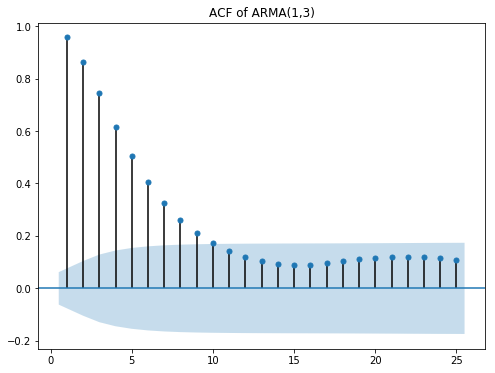

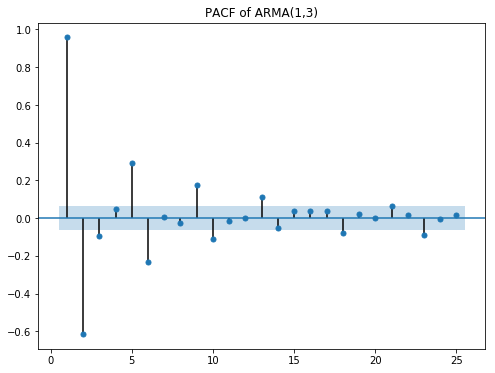

In [102]:
# Example MA(1,3) model

ar1 = np.array([1, -0.8])
am1 = np.array([1,0.8,0.6,0.6])
result1 = ArmaProcess(ar1, am1)
data_ar1 = result1.generate_sample(nsample=1000)

plot_acf(data_ar1, lags = 25, zero=False)
plt.title('ACF of ARMA(1,3)')
plot_pacf(data_ar1, lags = 25, zero=False)
plt.title('PACF of ARMA(1,3)')
plt.show()

Example of AR(1) model as MA($\infty$)
===

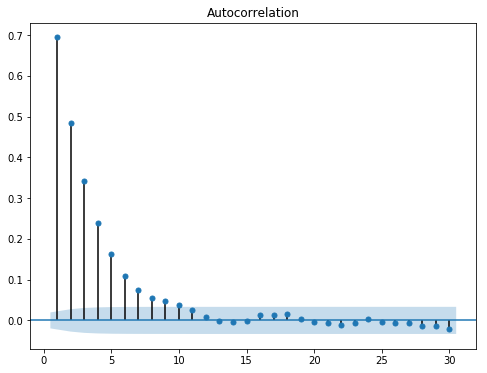

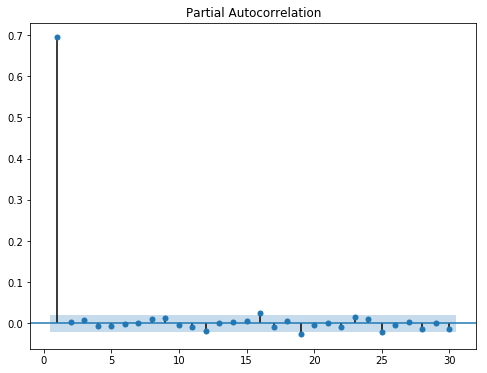

In [103]:
# Here we see in practice how an AR process can be viewed as an MA(infty) process
# For that, we need to create an MA process wiht many parameters, so lets pass an array of coefficients
# to the ArmaProcess generator

#MA coefficients up to 30!
ma_params = np.zeros(30)
for i in range(30):
    ma_params[i] = 0.7**i
    
ar1 = np.array([1]) #The input is inserted as negative in function 
result1 = ArmaProcess(ar1, ma_params)
data_ma_infty = result1.generate_sample(nsample=10000)

plot_acf(data_ma_infty, lags = 30, zero = 0)
plt. show()
plot_pacf(data_ma_infty, lags = 30, zero = 0)
plt. show()


Example with AEMO data for ARMA(1,1)
===

In [104]:
# Retreiveing AEMO prices - retail prices of electricity

df3 = pd.read_csv('AEMOPriceDataSimple.csv', index_col = 0)
logprice = np.log(df3)

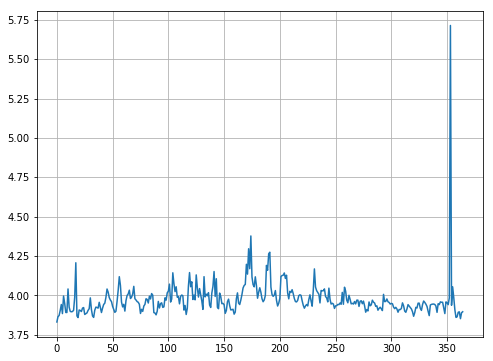

In [105]:
plt.plot(logprice.values)
plt.grid()
plt.show()

In [106]:
# Do something about outlier (it makes sense in this case)
percent_replace = 4.266077 # replace with quantile 99%
loc = logprice.idxmax()
logprice['RRP'][loc]=percent_replace

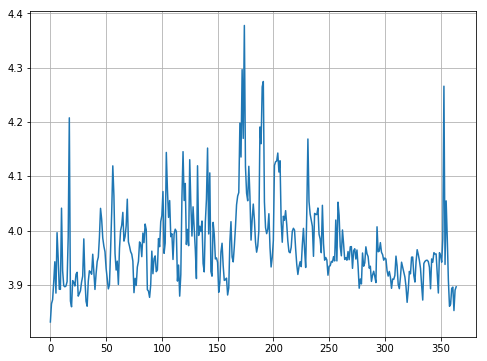

In [107]:
plt.plot(logprice.values)
plt.grid()
plt.show()

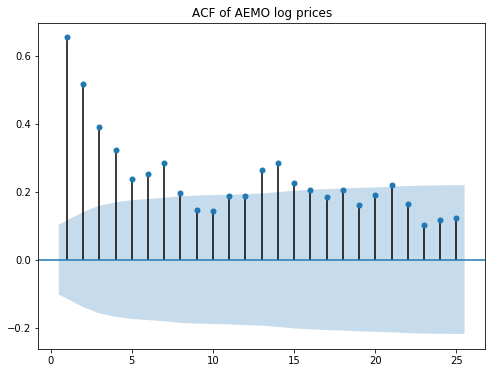

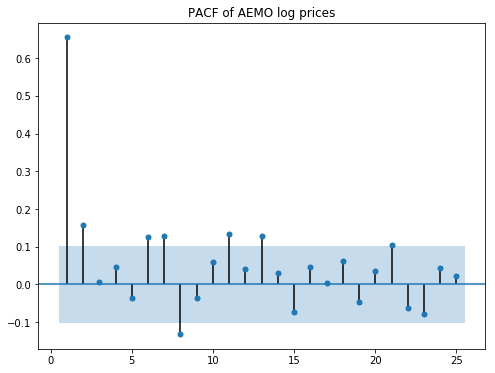

In [108]:
plot_acf(logprice.values, lags = 25, zero=False)
plt.title('ACF of AEMO log prices')
plot_pacf(logprice.values, lags = 25, zero=False)
plt.title('PACF of AEMO log prices')
plt.show()

In [109]:
model = ARMA(logprice.values, order=(1,1)) #Order of AR is 1, MA is 1.
AR1_MAl_res = model.fit()
print(AR1_MAl_res.summary());

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  365
Model:                     ARMA(1, 1)   Log Likelihood                 529.063
Method:                       css-mle   S.D. of innovations              0.057
Date:                Thu, 19 Nov 2020   AIC                          -1050.127
Time:                        08:57:14   BIC                          -1034.527
Sample:                             0   HQIC                         -1043.927
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9703      0.011    366.187      0.000       3.949       3.992
ar.L1.y        0.7944      0.048     16.661      0.000       0.701       0.888
ma.L1.y       -0.2432      0.076     -3.195      0.0

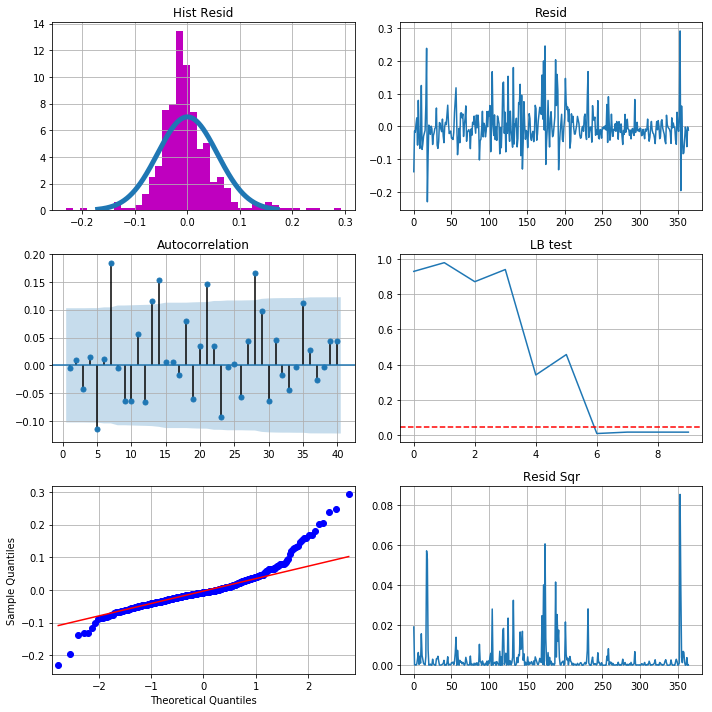

In [110]:
resid = AR1_MAl_res.resid
plot_diagnosticsTight3(resid)

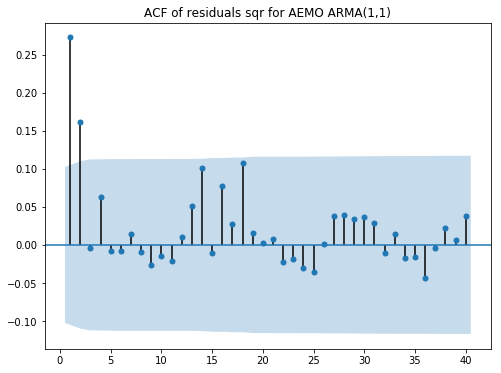

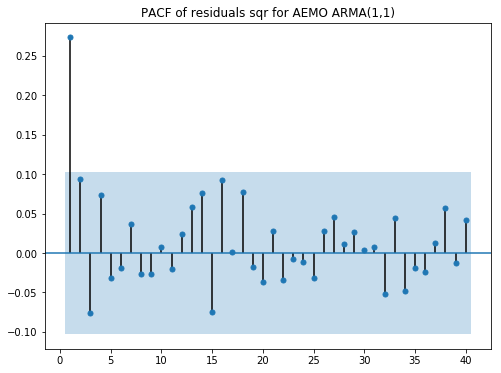

In [111]:
plot_acf(resid**2, lags = 40,zero =False)
plt.title('ACF of residuals sqr for AEMO ARMA(1,1)')
plt.show()
plot_pacf(resid**2, lags = 40,zero =False)
plt.title('PACF of residuals sqr for AEMO ARMA(1,1)')
plt.show()

Example with AEMO log returns data for ARMA(2,1)
===

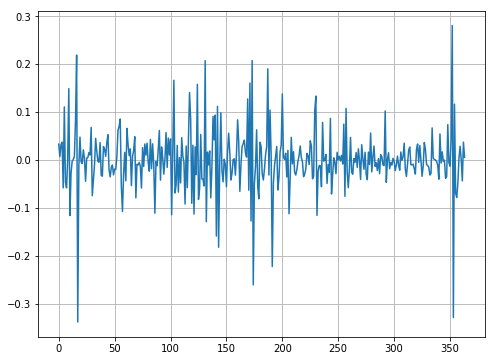

In [112]:
logprice_diff = logprice.diff().dropna().values
plt.plot(logprice_diff)
plt.grid()
plt.show()

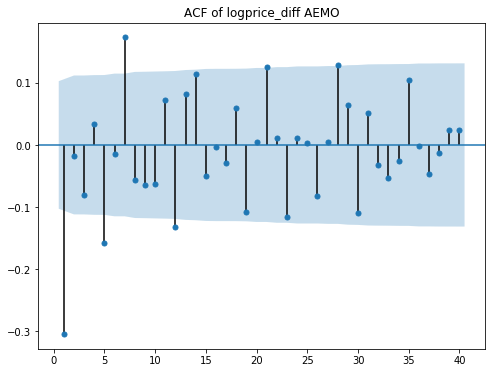

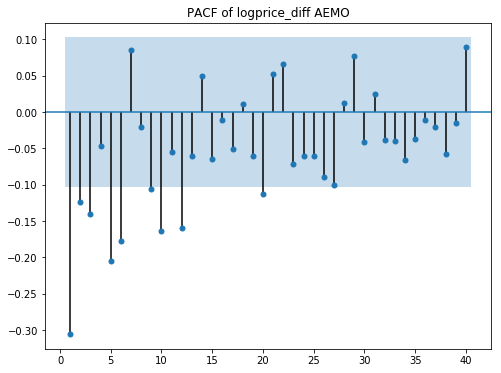

In [113]:
plot_acf(logprice_diff, lags = 40,zero =False)
plt.title('ACF of logprice_diff AEMO')
plt.show()
plot_pacf(logprice_diff, lags = 40,zero =False)
plt.title('PACF of logprice_diff AEMO')
plt.show()

In [114]:
import pmdarima as pm
model = pm.auto_arima(logprice_diff, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd', not relevant here.
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd', not relevant
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=-1047.158, BIC=-1031.569, Fit time=0.121 seconds
Fit ARIMA: order=(0, 0, 0); AIC=-974.913, BIC=-967.119, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-1008.239, BIC=-996.547, Fit time=0.020 seconds
Fit ARIMA: order=(0, 0, 1); AIC=-1019.651, BIC=-1007.959, Fit time=0.029 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-1049.070, BIC=-1029.585, Fit time=0.201 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-1011.741, BIC=-996.152, Fit time=0.048 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-1047.895, BIC=-1024.512, Fit time=0.301 seconds
Fit ARIMA: order=(3, 0, 2); AIC=-1045.950, BIC=-1018.670, Fit time=0.770 seconds
Fit ARIMA: order=(3, 0, 1); AIC=-1047.484, BIC=-1024.102, Fit time=0.377 seconds
Total fit time: 1.876 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  364
Model:                     ARMA(2, 1)   Log Likelihood                 529.535
Method: 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  365
Model:                     ARMA(2, 1)   Log Likelihood                 529.072
Method:                       css-mle   S.D. of innovations              0.057
Date:                Thu, 19 Nov 2020   AIC                          -1048.144
Time:                        09:03:07   BIC                          -1028.645
Sample:                             0   HQIC                         -1040.395
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9704      0.011    370.752      0.000       3.949       3.991
ar.L1.y        0.7257      0.497      1.459      0.145      -0.249       1.701
ar.L2.y        0.0471      0.338      0.139      0.8

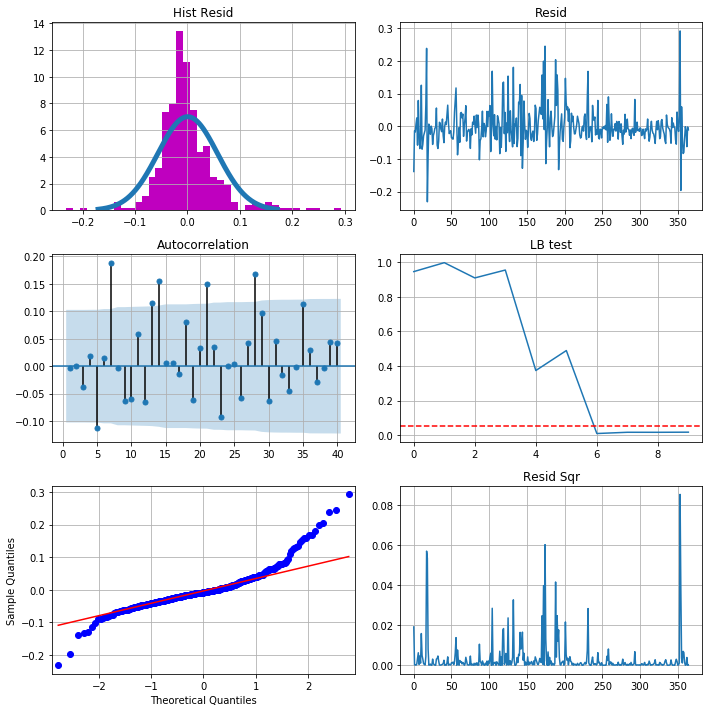

In [124]:
model = ARMA(logprice.values, order=(2,1)) #Order of AR is 2, MA is 1.
AR2_MAl_res = model.fit()
print(AR2_MAl_res.summary());
resid = AR2_MAl_res.resid
plot_diagnosticsTight3(resid)

Stationary Tests: Augmented Dickey-Fuller and KPSS
====

Let's start with some theoretical examples

In [115]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

Let's start with some theoretical processes and run the ADF and KPSS tests.

Stationarity Test for MA(3)
===

In [116]:
# Test ADF for MA(3) model

ar1 = np.array([1])
am1 = np.array([1,0.8,0.6,0.6])
result1 = ArmaProcess(ar1, am1)
data_ar1 = result1.generate_sample(nsample=1000)
test = adfuller(data_ar1)
test

(-7.136789738755185,
 3.404644350364006e-10,
 16,
 983,
 {'1%': -3.4370198458812156,
  '5%': -2.864484708707697,
  '10%': -2.568337912084273},
 2812.5429449532157)

In [117]:
test = adfuller(data_ar1)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -7.136790
p-value: 0.000000
Critical Values:i/
	1%: -3.44
	5%: -2.86
	10%: -2.57


Hence we reject the hypothesis that the series has a unit root, or in other words, this series is stationary (as expected).

What about the KPSS method?

In [118]:
test = kpss(data_ar1, lags=10) #Notice how the number of lags here has an effect on the test 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 0.046058
p-value: 0.100000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


In this case, we cannot reject the null hypothesis that the process is stationary - as expected again!

Stationarity Test Random Walk
===

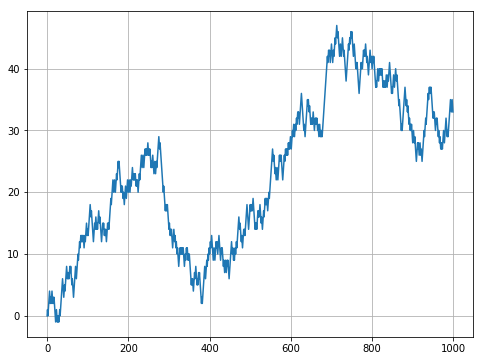

In [119]:
np.random.seed(17)
nSim = 1000

rw = np.zeros(nSim)

for i in range(1, nSim):
    temp = np.random.normal()
    if ( temp < 0.): 
        up_down = -1 
    else:
        up_down = 1
    rw[i] = rw[i-1] + up_down
    
plt.plot(rw)
plt.grid()
plt.show()


In [120]:
test = adfuller(rw)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:i/')
for item, value in test[4].items():
    print('\t%s: %.2f' % (item, value))

ADF Statistic: -1.846741
p-value: 0.357515
Critical Values:i/
	1%: -3.44
	5%: -2.86
	10%: -2.57


Hence we cannot reject the hypothesis that the series has a unit root (as expected).


In [121]:
test = kpss(rw) #Notice how the number of lags here has an effect on the test 
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')
for item, value in test[3].items():
    print('\t%s: %.2f' % (item, value))

KPSS Statistic: 2.902163
p-value: 0.010000
Critical Values:
	10%: 0.35
	5%: 0.46
	2.5%: 0.57
	1%: 0.74


In this case, we reject the null hypothesis that the process is stationary - as expected again!